ML estimation of Case V fitnesses is way better than least squares!

In [1]:
import os; os.chdir("..")
import sys; sys.path.append("../../Path_Scripts")
import matplotlib.pyplot as plt
from rlutils.observers.pbrl import load
from rlutils.observers.pbrl.models import least_squares_fitness, maximum_likelihood_fitness
from config.oracles import dist_closing_uperr_v2 as oracle

<IPython.core.display.Javascript object>

In [26]:
pbrl = load("models/ethereal-wind-105/700.pbrl", {})
graph = pbrl.graph.random_nodewise_connected_subgraph(350, partitioned=True)[0]

Loaded models/ethereal-wind-105/700.pbrl


In [27]:
transitions, A, i_list, j_list, y = graph.make_data_structures()
A.shape

torch.Size([2612, 350])

In [28]:
f_true = [sum(oracle(tr)).item() for tr in transitions]
f_old, _, _ = least_squares_fitness(A, y, 0.9, "thurstone")
f_new, _ = maximum_likelihood_fitness(A, y, "thurstone", lr=1e-1, epsilon=1e-5)

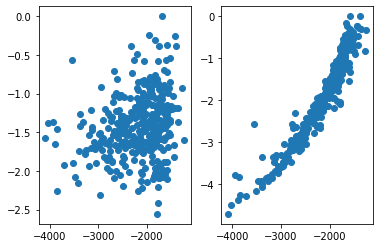

In [29]:
_, axes = plt.subplots(1, 2)
axes[0].scatter(f_true, f_old)
axes[1].scatter(f_true, f_new)